In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, ttest_ind

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


from sklearn import metrics

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('D:/HTML/bigmartTrain.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
print("Number of Rows:",df_train.shape[0])
print("Number of Features:",df_train.shape[1])

Number of Rows: 8523
Number of Features: 12


In [5]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Numerical Features:

- Item_Weight
- Item_Visibility
- Item_MRP
- Outlet_Establishment_Year
- Item_Outlet_Sales

Categorical Features:

- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

Columns that have null values:

- Item_Weight
- Outlet_Size

In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [3]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [4]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [11]:
df_train.groupby('Outlet_Type')['Outlet_Size'].agg(pd.Series.mode)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [5]:
df_train.loc[df_train['Outlet_Type']=='Grocery Store','Outlet_Size']='Small'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type1','Outlet_Size']='Small'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type2','Outlet_Size']='Medium'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type3','Outlet_Size']='Medium'

In [6]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [50]:
df_train.duplicated().any()

False

In [7]:
df_train.to_csv("Bigmart_upd.csv", index= False)

In [8]:
df_train= pd.read_csv("Bigmart_upd.csv")

In [16]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Small,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [17]:
df_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [9]:
df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [10]:
df_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [11]:
le = LabelEncoder()

df_train['Item_Fat_Content'] = le.fit_transform(df_train['Item_Fat_Content'])

df_train['Item_Type'] = le.fit_transform(df_train['Item_Type'])

df_train['Outlet_Size'] = le.fit_transform(df_train['Outlet_Size'])

df_train['Outlet_Location_Type'] = le.fit_transform(df_train['Outlet_Location_Type'])

df_train['Outlet_Type'] = le.fit_transform(df_train['Outlet_Type'])

df_train['Item_Identifier'] = le.fit_transform(df_train['Item_Identifier'])

df_train['Outlet_Identifier'] = le.fit_transform(df_train['Outlet_Identifier'])

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


In [22]:
df_train.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,0.781415,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.413311,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,1.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,1.000000,2.000000,3.000000,13086.964800


In [12]:
#applying Seaborn's default aesthetic settings to your plots
sns.set()

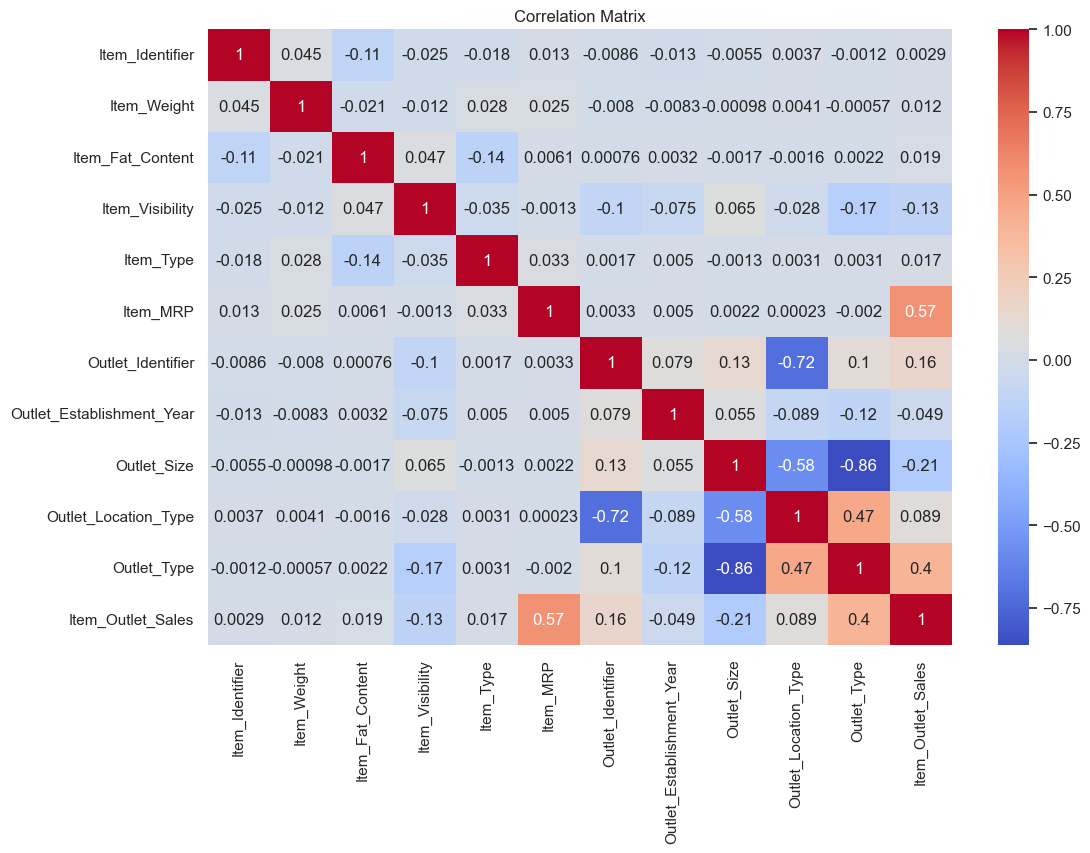

In [13]:
correlation_matrix = df_train.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [52]:
# Check for significant correlation between Item MRP and Sales
correlation, p_val = pearsonr(df_train['Item_MRP'], df_train['Item_Outlet_Sales'])
print(f"Pearson correlation between Item MRP and Sales: {correlation}, p-value: {p_val}")

Pearson correlation between Item MRP and Sales: 0.5675744466569189, p-value: 0.0


In [14]:
# Ensure the Outlet_Type is correctly encoded and check the unique values
print(df_train['Outlet_Type'].unique())

# Perform ANOVA test to determine if Outlet_Type significantly impacts Item_Outlet_Sales
anova_result = stats.f_oneway(
    df_train[df_train['Outlet_Type'] == 0]['Item_Outlet_Sales'],  # Grocery Store
    df_train[df_train['Outlet_Type'] == 1]['Item_Outlet_Sales'],  # Supermarket Type1
    df_train[df_train['Outlet_Type'] == 2]['Item_Outlet_Sales'],  # Supermarket Type2
    df_train[df_train['Outlet_Type'] == 3]['Item_Outlet_Sales']   # Supermarket Type3
)

print(f"ANOVA test results for Outlet_Type: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


[1 2 0 3]
ANOVA test results for Outlet_Type: F-statistic = 894.6500119018012, p-value = 0.0


In [15]:
from scipy.stats import ttest_ind

# Grouping data: Outlet_Type 0 (Grocery Store) vs. Outlet_Type 1 (Supermarket Type1)
supermarket = df_train[df_train['Outlet_Type'] == 1]['Item_Outlet_Sales']
grocery_store = df_train[df_train['Outlet_Type'] == 0]['Item_Outlet_Sales']

# Perform an independent t-test
t_stat, p_value = ttest_ind(supermarket, grocery_store, nan_policy='omit')
print(f"T-test result: t-statistic = {t_stat}, p-value = {p_value}")


T-test result: t-statistic = 42.777859363653086, p-value = 0.0


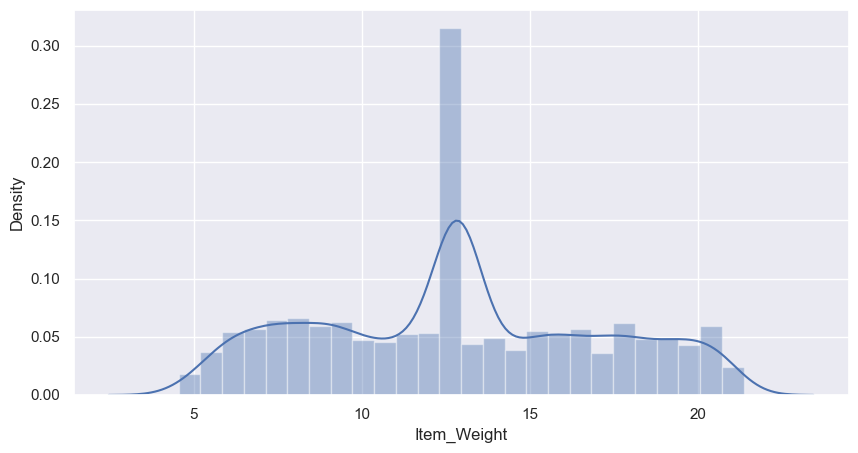

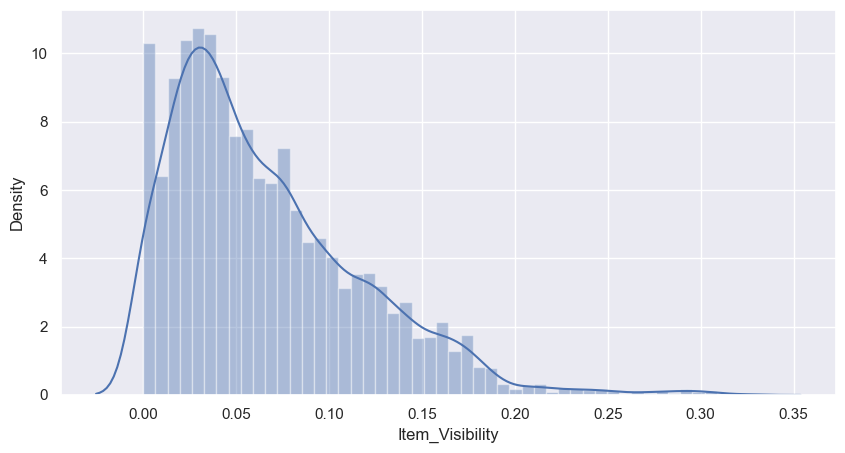

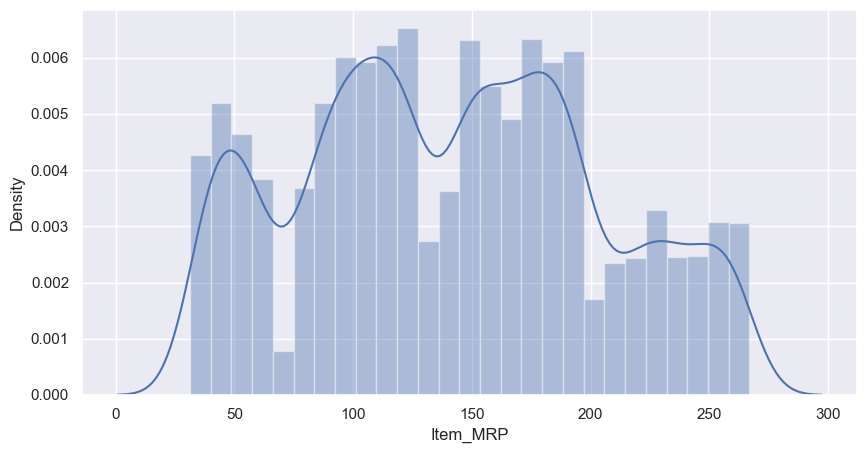

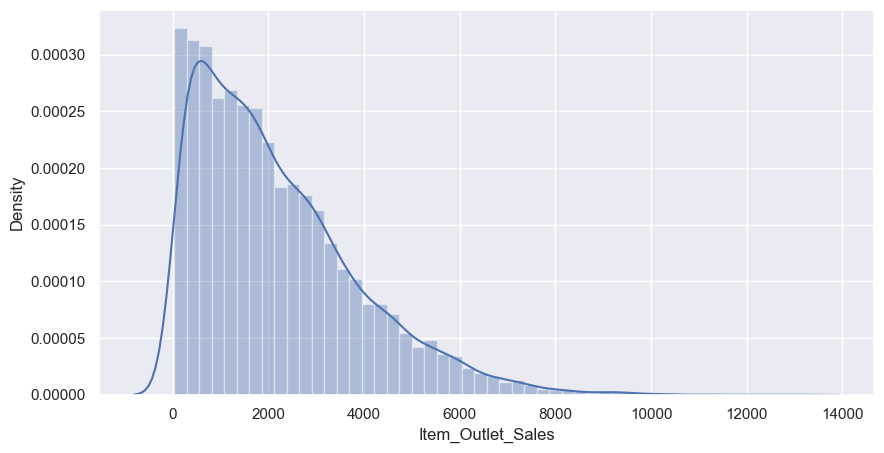

In [27]:
cols = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
for col in cols:
    plt.figure(figsize=(10,5))
    sns.distplot(df_train[col])
    plt.show()

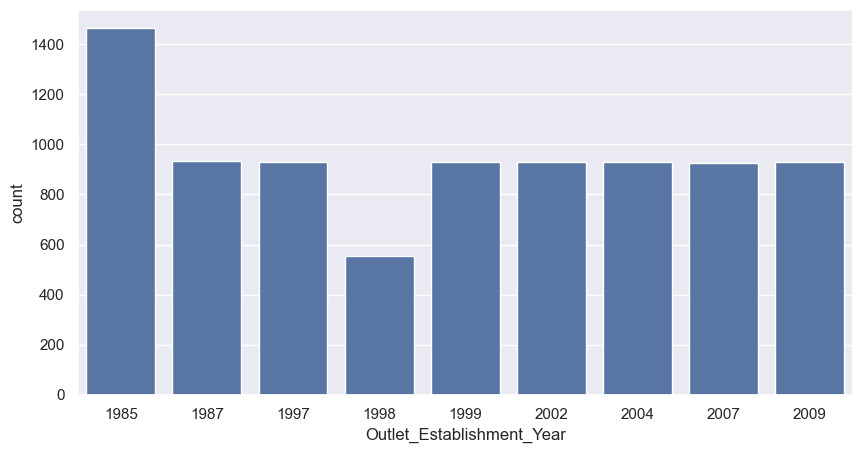

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Establishment_Year', data=df_train)
plt.show()

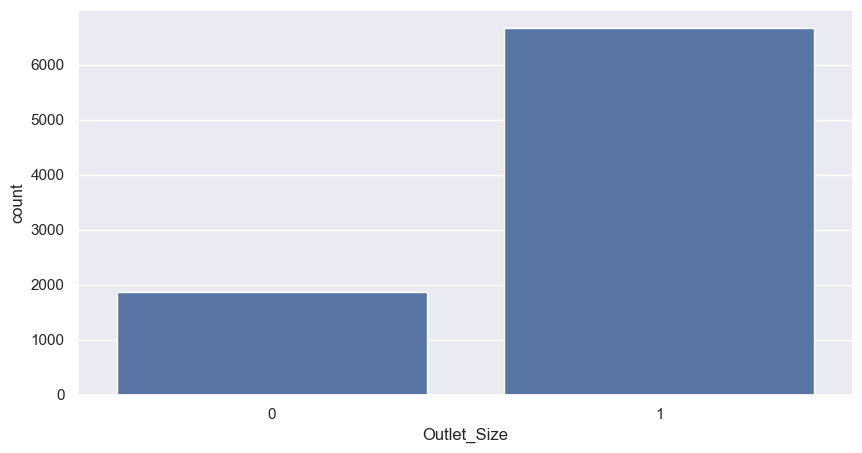

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Size" , data=df_train)
plt.show()

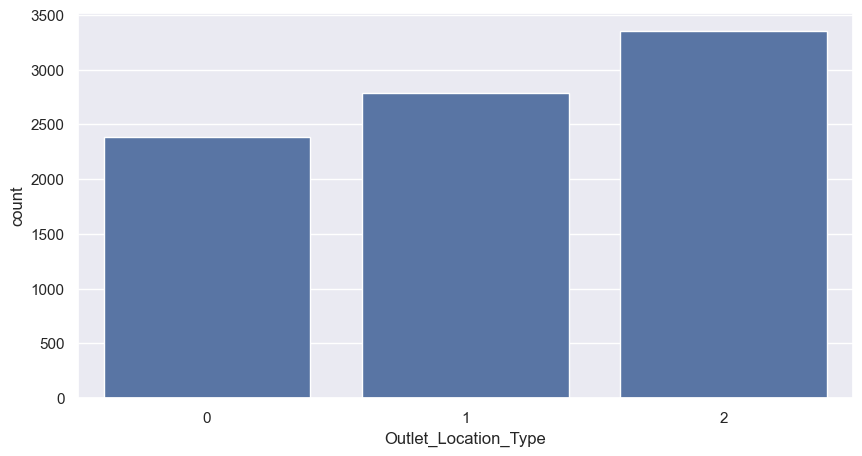

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Location_Type" , data=df_train)
plt.show()

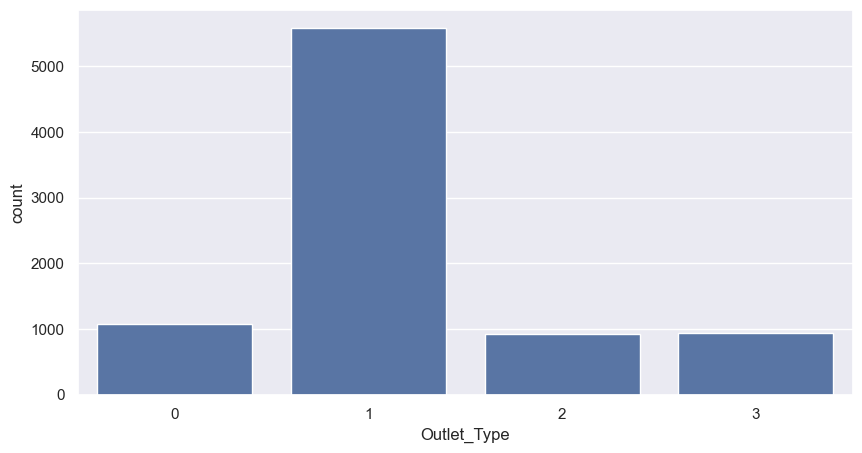

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Type" , data=df_train)
plt.show()

In [16]:
sc = StandardScaler()

df_train['Item_Weight'] = sc.fit_transform(df_train['Item_Weight'].values.reshape(-1,1))

df_train['Item_Visibility'] = sc.fit_transform(df_train['Item_Visibility'].values.reshape(-1,1))

df_train['Item_MRP'] = sc.fit_transform(df_train['Item_MRP'].values.reshape(-1,1))

df_train['Item_Outlet_Sales'] = sc.fit_transform(df_train['Item_Outlet_Sales'].values.reshape(-1,1))

df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,-0.841872,0,-0.970732,4,1.747454,9,1999,1,0,1,0.910601
1,8,-1.641706,1,-0.908111,14,-1.489023,3,2009,0,2,2,-1.018440
2,662,1.098554,0,-0.956917,10,0.010040,9,1999,1,0,1,-0.049238
3,1121,1.500838,1,-1.281758,6,0.660050,0,1998,1,2,0,-0.849103
4,1297,-0.929428,0,-1.281758,9,-1.399220,1,1987,1,2,1,-0.695373
5,758,-0.582754,1,-1.281758,0,-1.438734,3,2009,0,2,2,-0.952110
6,696,0.187501,1,-1.034813,13,-1.338238,1,1987,1,2,1,-1.076967
7,738,0.000000,0,1.188838,13,-0.533641,5,1985,0,2,3,1.079158
8,440,0.790926,1,-0.958331,5,-0.706908,7,2002,1,1,1,-0.647381
9,990,1.500838,1,0.548845,5,0.752008,2,2007,1,1,1,1.482212


In [17]:
Features = df_train.drop(columns=['Item_Outlet_Sales'])

Target = df_train['Item_Outlet_Sales']

In [18]:
Features_train,Features_test,Target_train,Target_test = train_test_split(Features,Target,test_size=0.2,random_state=42)

In [19]:
print("Shape of Features:",Features.shape)
print("Shape of Features_train:",Features_train.shape)
print("Shape of Features_test:",Features_test.shape)

Shape of Features: (8523, 11)
Shape of Features_train: (6818, 11)
Shape of Features_test: (1705, 11)


In [36]:
print("Shape of Target:",Target.shape)
print("Shape of Target_train:",Target_train.shape)
print("Shape of Target_test:",Target_test.shape)

Shape of Target: (8523,)
Shape of Target_train: (6818,)
Shape of Target_test: (1705,)


### Linear Regression

In [20]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(Features_train,Target_train) #fit 
print(linear_model.predict(Features_test))     #predict
print(Target_test)

[-0.51628608 -0.83529931 -0.82237444 ... -0.83425601 -0.95942446
 -0.23063556]
7503   -0.256812
2957   -1.069164
7031   -1.057068
1084    2.108058
856     0.102932
          ...   
7205    0.482185
3257   -0.756241
6346   -0.909581
6318   -1.130031
6339   -0.705908
Name: Item_Outlet_Sales, Length: 1705, dtype: float64


In [21]:
print("Linear Model Score: ",linear_model.score(Features_test, Target_test))

Linear Model Score:  0.5805005506202869


### KNN Regression

In [22]:
scaler = StandardScaler()
scaler.fit(Features_train)
X_train_scaled = scaler.transform(Features_train)
X_test_scaled = scaler.transform(Features_test)
X_train_scaled ,X_test_scaled

(array([[ 0.71776596, -0.80021083,  1.34421592, ...,  0.53404367,
         -1.38348228, -0.25948864],
        [ 1.20792126,  1.21131742, -0.74392811, ...,  0.53404367,
         -0.14965858, -0.25948864],
        [ 0.86704053,  1.11665727,  1.34421592, ...,  0.53404367,
         -1.38348228, -0.25948864],
        ...,
        [ 1.52429422,  1.11665727, -0.74392811, ...,  0.53404367,
         -0.14965858, -0.25948864],
        [-0.3806275 ,  1.76744582, -0.74392811, ...,  0.53404367,
         -0.14965858, -0.25948864],
        [ 1.41289529,  0.82084429, -0.74392811, ...,  0.53404367,
         -1.38348228, -0.25948864]]),
 array([[-0.65244089,  0.33571101, -0.74392811, ...,  0.53404367,
          1.08416512, -0.25948864],
        [ 1.36387976, -1.17175193, -0.74392811, ...,  0.53404367,
         -1.38348228, -0.25948864],
        [-1.1938397 ,  0.38304109,  1.34421592, ...,  0.53404367,
         -1.38348228, -0.25948864],
        ...,
        [-1.1938397 ,  0.38304109,  1.34421592, ...,  

In [23]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, Target_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(Target_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(Target_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(Target_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)


Mean Absolute Error (MAE)    : 0.4713718240229295
Mean Squared Error (MSE)     : 0.4623974792461678
Root Mean Square Error (RMSE): 0.6799981465020091
R-squared (R2) Score         : 0.5046271283066723


In [24]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=42)
dt_regressor.fit(Features_train, Target_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(Features_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(Target_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(Target_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(Target_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 0.582483235646497
Mean Squared Error (MSE)     : 0.7235788493643981
Root Mean Square Error (RMSE): 0.8506343805445428
R-squared (R2) Score         : 0.22481988204055237


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(Features_train, Target_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(Features_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Target_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Target_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(Target_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

Mean Absolute Error (MAE)    : 0.4490860222529845
Mean Squared Error (MSE)     : 0.41408261607569713
Root Mean Square Error (RMSE): 0.6434925143897924
R-squared (R2) Score         : 0.5563875153945191


In [26]:
XGBRModel = XGBRegressor()

#fit the model
XGBRModel.fit(Features_train,Target_train)

#predict the model
Target_pred = XGBRModel.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred)
print("Mean Squared Error:",mse)

R-Squared: 0.5119126417237851
Mean Absolute Error: 0.47173654608004656
Mean Squared Error: 0.45559693922553346


In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV

x= df_train.drop(columns=["Item_Outlet_Sales"], axis=1)
y= df_train["Item_Outlet_Sales"]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

parameters_r= {"max_depth": [2, 4, 10, 20],
               "min_samples_split": [2, 5, 10],
               "min_samples_leaf": [1, 2, 4],
               "max_features": ["sqrt", "log2", None]}

gridsearch_r= GridSearchCV(estimator= RandomForestRegressor(), param_grid= parameters_r, cv= 5,n_jobs=-1)
gridsearch_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [30]:
gridsearch_r.cv_results_

{'mean_fit_time': array([0.31373162, 0.30610304, 0.3100872 , 0.3046669 , 0.28926563,
        0.29435492, 0.29974089, 0.27621431, 0.30516181, 0.29339767,
        0.28942003, 0.31044846, 0.32765813, 0.33341837, 0.31604872,
        0.29447808, 0.2851965 , 0.29715796, 0.67167287, 0.62930484,
        0.64360213, 0.65612426, 0.60472555, 0.62710266, 0.629317  ,
        0.61016045, 0.62969518, 0.41441507, 0.43335123, 0.43404284,
        0.42763252, 0.44136724, 0.45356932, 0.46033468, 0.41608996,
        0.4046473 , 0.44551034, 0.44012938, 0.51966324, 0.61574206,
        0.66677132, 0.56531043, 0.59959588, 0.68969426, 0.55215454,
        1.58191156, 1.41766176, 1.59746051, 1.50477071, 1.51433892,
        1.60383954, 1.50603108, 1.34349132, 1.26086884, 0.85761662,
        0.83111033, 0.78856444, 0.80152044, 0.81826496, 0.78281398,
        0.77513633, 0.81960182, 0.7752315 , 0.8995645 , 1.02581739,
        1.07498784, 1.01280489, 1.14968648, 1.29242907, 1.05084968,
        1.03138013, 1.11623769,

In [31]:
gridsearch_r.best_score_

0.5867949653862083

In [49]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create the XGBoost Regressor model
xg_regressor = xgb.XGBRegressor(random_state=42)

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2,3, 5, 7]
}

# Grid search with cross-validation
grid_search_xgb = GridSearchCV(estimator=xg_regressor, param_grid=param_grid_xgb, cv=5, scoring='r2', n_jobs=-1)
grid_search_xgb.fit(Features_train, Target_train)

# Best parameters and model
print("Best Parameters for XGBoost Regressor:", grid_search_xgb.best_params_)
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluate the best model
y_pred_xgb = best_xgb_model.predict(Features_test)
print(f"R2 Score with XGBoost Regressor: {r2_score(Target_test, y_pred_xgb)}")

Best Parameters for XGBoost Regressor: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
R2 Score with XGBoost Regressor: 0.6143758157733903


In [48]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Prepare the data
x = df_train.drop(columns=['Item_Outlet_Sales'], axis=1)
y = df_train['Item_Outlet_Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the XGBoost Regressor model
xg_regressor = xgb.XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=100, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Collect metrics in a dictionary
metrics_xgb = {
    'R2': r2,
    'Mean Absolute Error': mae,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse
}

print(metrics_xgb)

{'R2': 0.6143758157733903, 'Mean Absolute Error': 0.422921712265753, 'Mean Squared Error': 0.35995441194271177, 'Root Mean Squared Error': 0.5999620087494806}


In [50]:
import pickle

with open("Bigmart_Sales.pkl","wb") as f:
    pickle.dump(xg_regressor, f)